In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('adult.csv')

In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9610,25,Private,318644,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
9611,20,Private,227594,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
9612,59,Private,165695,Assoc-acdm,12,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,32.0,United-States,>50K
9613,55,Private,127728,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,50.0,United-States,>50K


In [ ]:
df.education.value_counts()

education
HS-grad         3121
Some-college    2125
Bachelors       1598
Masters          545
Assoc-voc        412
11th             358
Assoc-acdm       315
10th             273
7th-8th          186
Prof-school      146
9th              143
12th             121
Doctorate        106
5th-6th           98
1st-4th           48
Preschool         20
Name: count, dtype: int64

In [ ]:
df.workclass.value_counts()

workclass
Private             6574
Self-emp-not-inc     782
Local-gov            609
?                    584
State-gov            429
Self-emp-inc         353
Federal-gov          279
Without-pay            4
Never-worked           1
Name: count, dtype: int64

In [ ]:
df.occupation.value_counts()

occupation
Prof-specialty       1222
Exec-managerial      1213
Craft-repair         1183
Adm-clerical         1079
Sales                1066
Other-service         960
Machine-op-inspct     621
?                     585
Transport-moving      429
Handlers-cleaners     414
Farming-fishing       310
Tech-support          279
Protective-serv       194
Priv-house-serv        57
Armed-Forces            3
Name: count, dtype: int64

In [ ]:
df.gender.value_counts()

gender
Male      6409
Female    3205
Name: count, dtype: int64

In [ ]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [ ]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0.0,0.0,40.0,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0.0,0.0,50.0,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0.0,0.0,40.0,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688.0,0.0,40.0,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0.0,0.0,30.0,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9610,25,318644,13,Male,0.0,0.0,40.0,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
9611,20,227594,9,Female,0.0,0.0,40.0,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
9612,59,165695,12,Male,0.0,0.0,32.0,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
9613,55,127728,9,Male,0.0,0.0,50.0,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0 )
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0 )

In [ ]:
df['income']

0       0
1       0
2       0
3       0
4       0
       ..
9610    0
9611    0
9612    0
9613    0
9614    0
Name: income, Length: 9615, dtype: int64

In [ ]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

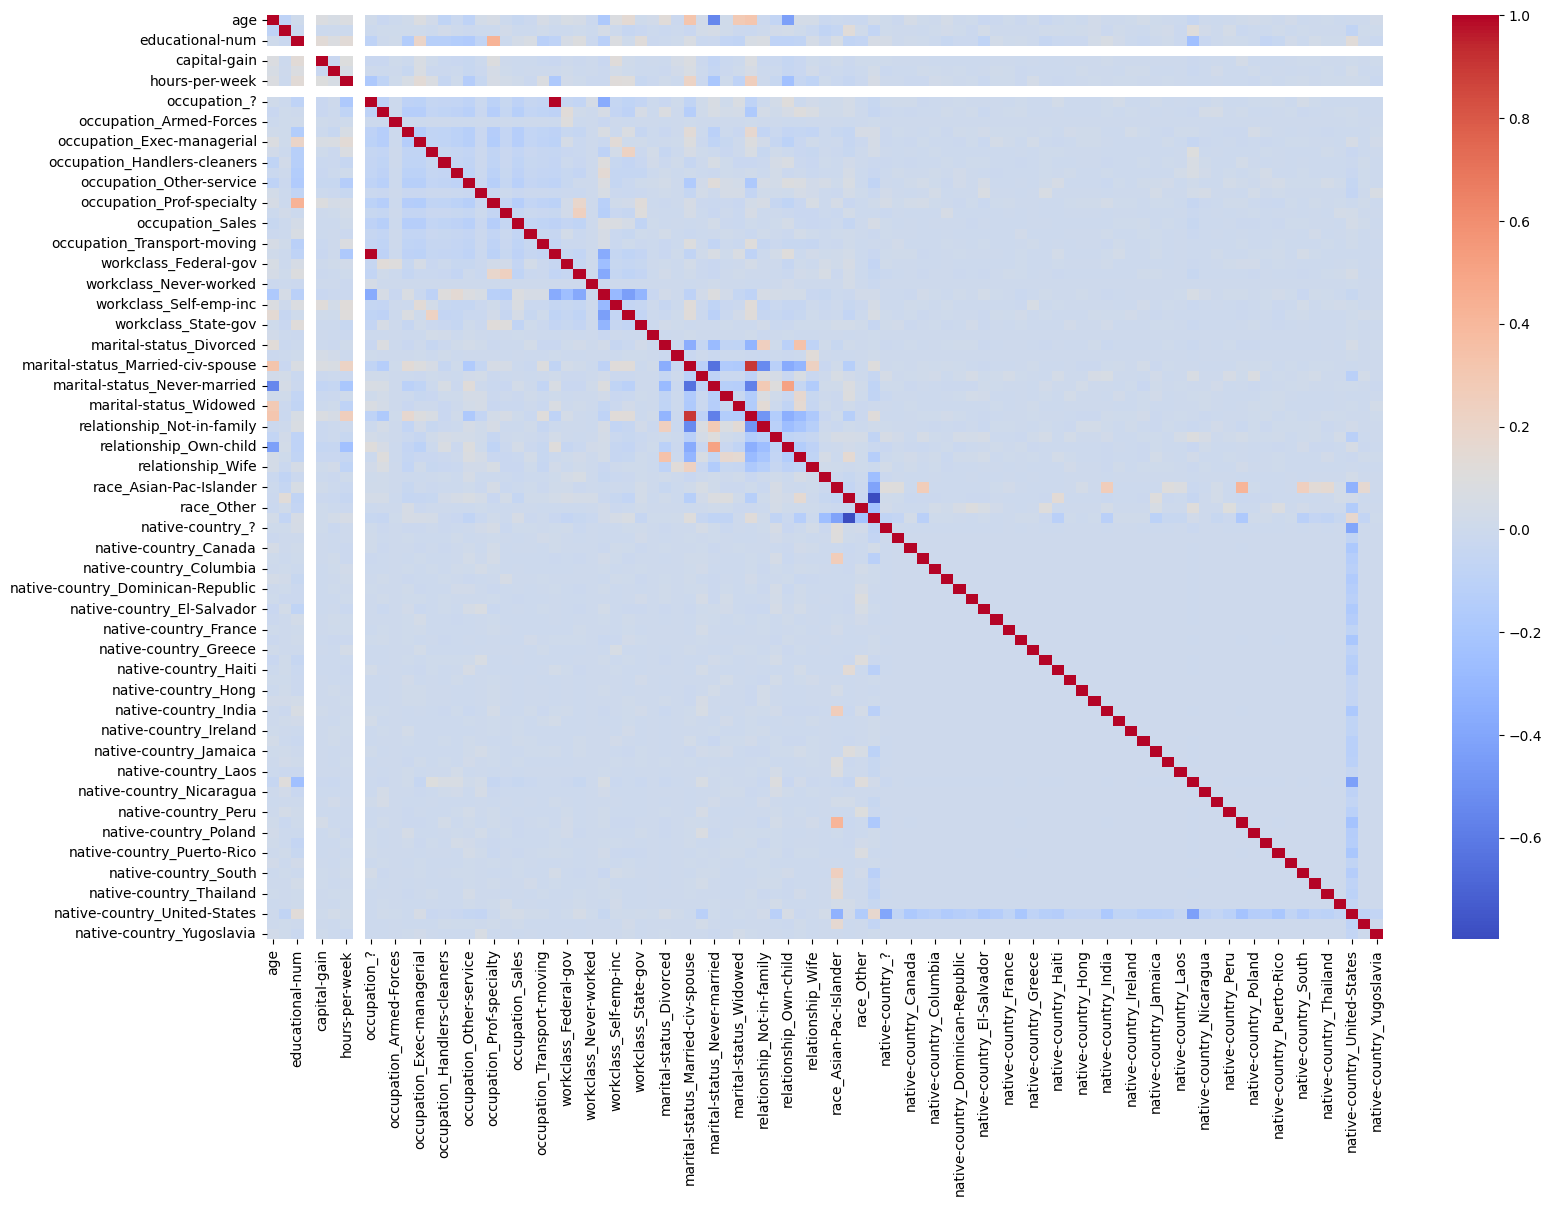

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18 , 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

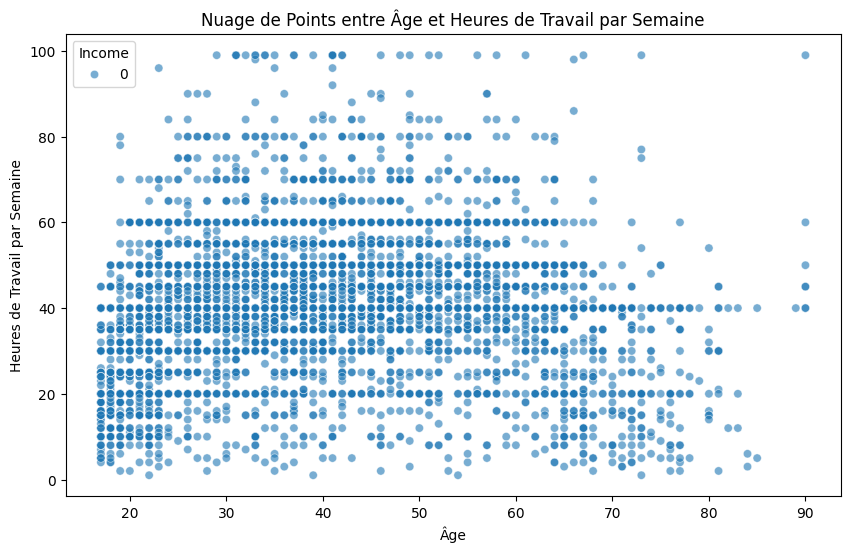

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='hours-per-week', hue='income', alpha=0.6)
plt.title('Nuage de Points entre Âge et Heures de Travail par Semaine')
plt.xlabel('Âge')
plt.ylabel('Heures de Travail par Semaine')
plt.legend(title='Income')
plt.show()

In [ ]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.081981,0.006963,NaN,0.082360,0.052424,0.081728,NaN,0.013408,-0.028311,...,0.012831,-0.000234,0.023182,-0.007858,-0.003657,0.008316,-0.008080,0.001372,-0.003100,0.018818
fnlwgt,-0.081981,1.000000,-0.024444,NaN,-0.005989,-0.000409,-0.004686,NaN,-0.005532,0.006304,...,-0.010143,0.015104,-0.007134,0.007239,-0.003815,-0.001887,-0.002432,-0.072202,0.004916,0.006415
educational-num,0.006963,-0.024444,1.000000,NaN,0.132639,0.083546,0.136237,NaN,-0.085229,0.001976,...,-0.054875,-0.033193,0.017088,-0.005885,0.024735,0.009062,0.003341,0.125534,-0.000846,-0.020542
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,0.082360,-0.005989,0.132639,NaN,1.000000,-0.030944,0.098911,NaN,-0.029802,-0.032134,...,-0.006159,-0.004139,-0.003244,0.006069,0.003486,-0.001604,-0.002901,0.006457,-0.000049,0.004218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,0.008316,-0.001887,0.009062,NaN,-0.001604,0.004837,0.003319,NaN,-0.008213,-0.001249,...,-0.001397,-0.002112,-0.000736,-0.001473,-0.000871,1.000000,-0.000658,-0.098370,-0.000871,-0.000658
native-country_Trinadad&Tobago,-0.008080,-0.002432,0.003341,NaN,-0.002901,-0.004440,0.003249,NaN,-0.005193,0.008905,...,-0.000884,-0.001335,-0.000465,-0.000931,-0.000551,-0.000658,1.000000,-0.062195,-0.000551,-0.000416
native-country_United-States,0.001372,-0.072202,0.125534,NaN,0.006457,0.026825,0.013611,NaN,-0.010539,0.016483,...,-0.132032,-0.199506,-0.069540,-0.139189,-0.082289,-0.098370,-0.062195,1.000000,-0.082289,-0.062195
native-country_Vietnam,-0.003100,0.004916,-0.000846,NaN,-0.000049,-0.005874,0.003211,NaN,-0.006870,-0.009597,...,-0.001169,-0.001766,-0.000616,-0.001232,-0.000729,-0.000871,-0.000551,-0.082289,1.000000,-0.000551


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt' , axis=1)
train_df , test_df = train_test_split(df, test_size=0.2)

In [ ]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
9540,51,16,0,0.0,0.0,60.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5943,26,10,0,0.0,0.0,38.0,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7083,59,9,0,0.0,0.0,40.0,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
850,26,13,0,0.0,0.0,40.0,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
7226,31,13,0,0.0,0.0,40.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9246,36,13,0,5178.0,0.0,40.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4644,21,10,0,0.0,0.0,60.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6664,34,13,0,6497.0,0.0,40.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8689,73,10,0,0.0,0.0,40.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
train_X = train_X.dropna()
train_y = train_y[train_X.index]

test_X = test_X.dropna()
test_y = test_y[test_X.index]


In [ ]:
train_X = train_df.drop('income' , axis=1)
train_y = train_df['income']

test_X = test_df.drop('income' , axis=1)
test_y = test_df['income']

In [ ]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [ ]:
forest.score(test_X , test_y)

1.0

In [ ]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k : v for k, v in sorted(importances.items() , key=lambda x: x [1], reverse=True)}

In [ ]:
importances


{'age': 0.0,
 'fnlwgt': 0.0,
 'educational-num': 0.0,
 'gender': 0.0,
 'capital-gain': 0.0,
 'capital-loss': 0.0,
 'hours-per-week': 0.0,
 'occupation_?': 0.0,
 'occupation_Adm-clerical': 0.0,
 'occupation_Armed-Forces': 0.0,
 'occupation_Craft-repair': 0.0,
 'occupation_Exec-managerial': 0.0,
 'occupation_Farming-fishing': 0.0,
 'occupation_Handlers-cleaners': 0.0,
 'occupation_Machine-op-inspct': 0.0,
 'occupation_Other-service': 0.0,
 'occupation_Priv-house-serv': 0.0,
 'occupation_Prof-specialty': 0.0,
 'occupation_Protective-serv': 0.0,
 'occupation_Sales': 0.0,
 'occupation_Tech-support': 0.0,
 'occupation_Transport-moving': 0.0,
 'workclass_?': 0.0,
 'workclass_Federal-gov': 0.0,
 'workclass_Local-gov': 0.0,
 'workclass_Never-worked': 0.0,
 'workclass_Private': 0.0,
 'workclass_Self-emp-inc': 0.0,
 'workclass_Self-emp-not-inc': 0.0,
 'workclass_State-gov': 0.0,
 'workclass_Without-pay': 0.0,
 'marital-status_Divorced': 0.0,
 'marital-status_Married-AF-spouse': 0.0,
 'marital-sta

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
!pip install pandas scikit-learn

In [ ]:
pipeline_rf = Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])
pipeline_lr = Pipeline(steps=[('classifier', LogisticRegression(random_state=42, max_iter=1000))])
pipeline_gb = Pipeline(steps=[('classifier', GradientBoostingClassifier(random_state=42))])

In [ ]:

pipelines = [pipeline_rf, pipeline_lr, pipeline_gb]
pipeline_names = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']